1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset



In [34]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


In [27]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [35]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['DaysofWeek'] = df['hour_beginning'].dt.day_name()
df_weekdays = df[df['hour_beginning'].dt.weekday < 5]

#total pedestrian count
ped_count = df_weekdays.groupby("DaysofWeek")['Pedestrians'].sum()

day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ped_count = ped_count.reindex(day)

ped_count

<ipython-input-35-555c0b3f781a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,Pedestrians
DaysofWeek,
Monday,1481435
Tuesday,1394963
Wednesday,1310900
Thursday,1370880
Friday,1588068


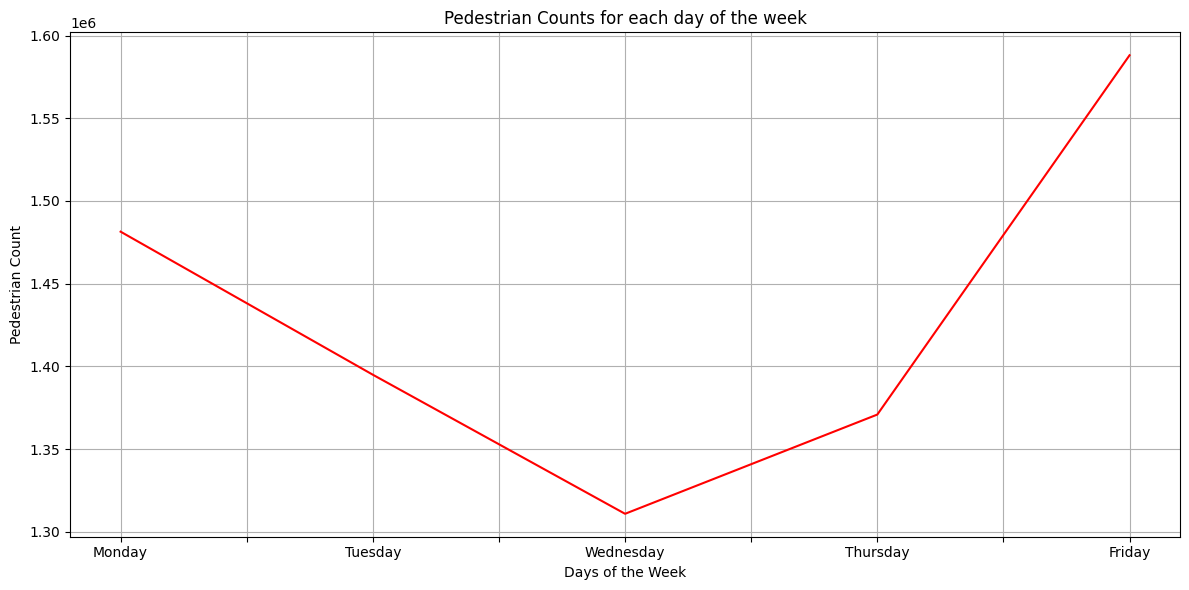

In [36]:
# Plotting a line plot of pedestrian counts for each day of the week
plt.figure(figsize=(12, 6))
ped_count.plot(color='red')
plt.title('Pedestrian Counts for each day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

In [61]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019_brooklyn = df_2019[df['location'] == 'Brooklyn Bridge']
df_2019_brooklyn.dropna() #dropping all the null values, could fillna too
df_encoded = pd.get_dummies(df_2019_brooklyn, columns=['weather_summary'], drop_first=True)
df_encoded.head(3)

<ipython-input-61-5fdd59c9fa48>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2019_brooklyn = df_2019[df['location'] == 'Brooklyn Bridge']


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,events,...,DaysofWeek,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,40.708164,-73.999509,NaN,...,Tuesday,False,False,False,False,False,False,False,False,False
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,42.0,0.0005,40.708164,-73.999509,NaN,...,Tuesday,False,True,False,False,False,False,False,False,False
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,42.0,0.0004,40.708164,-73.999509,NaN,...,Tuesday,False,True,False,False,False,False,False,False,False


In [62]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 8760
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   hour_beginning                       8761 non-null   datetime64[ns]
 1   location                             8761 non-null   object        
 2   Pedestrians                          8761 non-null   int64         
 3   Towards Manhattan                    8761 non-null   int64         
 4   Towards Brooklyn                     8761 non-null   int64         
 5   temperature                          8747 non-null   float64       
 6   precipitation                        8747 non-null   float64       
 7   lat                                  8761 non-null   float64       
 8   long                                 8761 non-null   float64       
 9   events                               572 non-null    object        
 10  Location1        

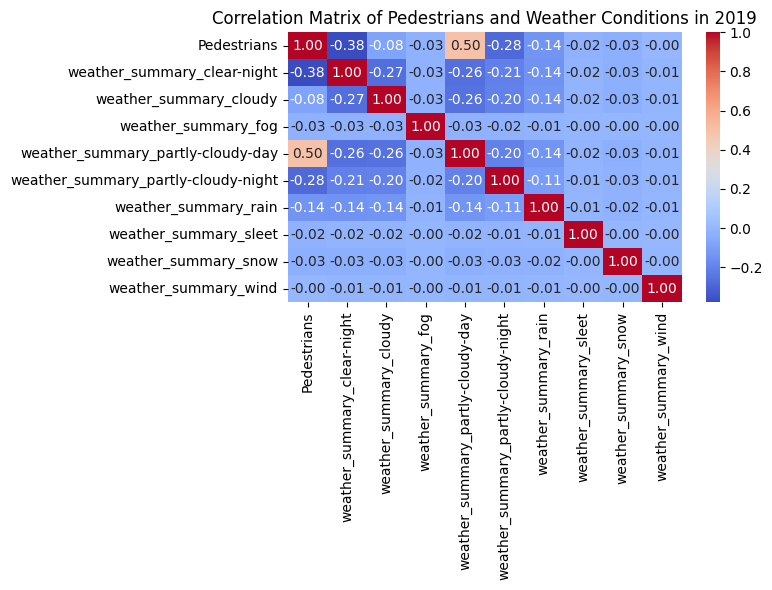

In [76]:
# Creating a correlation matrix
df_quantitative=df_encoded[['Pedestrians', 'weather_summary_clear-night','weather_summary_cloudy', 'weather_summary_fog', 'weather_summary_partly-cloudy-day', 'weather_summary_partly-cloudy-night','weather_summary_rain', 'weather_summary_sleet','weather_summary_snow','weather_summary_wind']]
correlation_matrix = df_quantitative.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather Conditions in 2019')
plt.tight_layout()
plt.show()

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
 12  DaysofWeek         16057 non-null  object        
 13  time_of_day        16057 non-null  object        
dtypes: dat

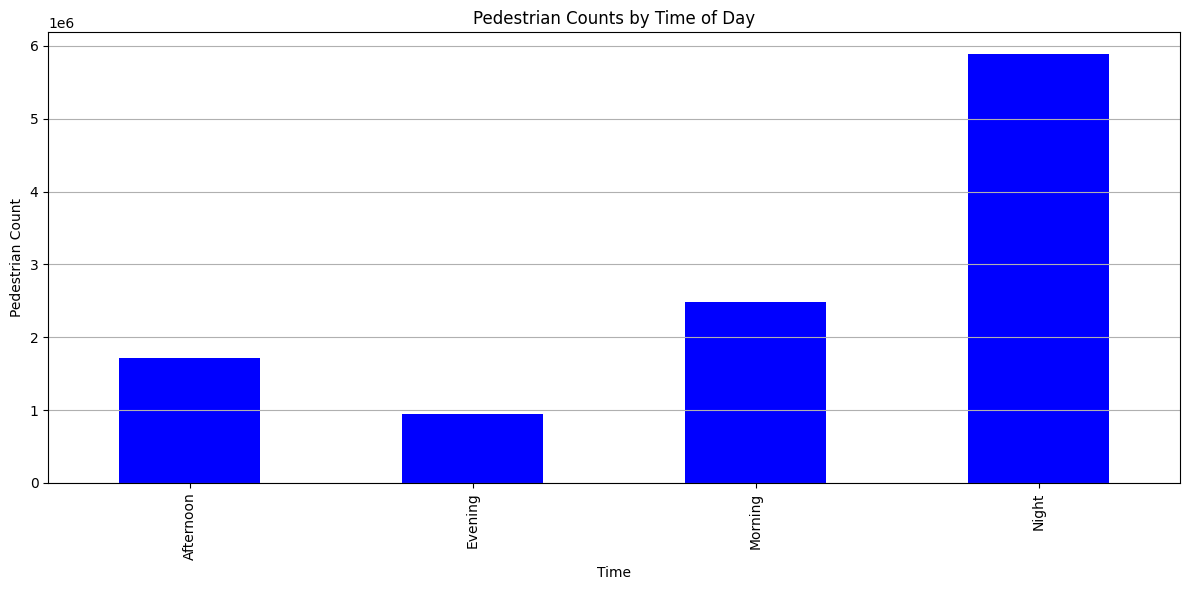

In [79]:
def categorizing(hours):
  if 5 <= hours < 12:
    return "Morning"
  elif 12 <= hours > 17:
    return "Afternoon"
  elif 17 <= hours < 21:
    return "Evening"
  else:
    return "Night"

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorizing)
grouping_by_time = df.groupby('time_of_day')['Pedestrians'].sum()

# Plotting the activity patterns
plt.figure(figsize=(12, 6))
grouping_by_time.plot(kind='bar', color='blue')
plt.title('Pedestrian Counts by Time of Day')
plt.xlabel('Time')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
